In [1]:
import azureml.dataprep as dprep
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
clicks_df = pd.read_csv("../clicks_latest_raw.csv")

In [3]:
clicks_df.head()

,client_id,session_id,page,date,time,timeframe,reg_no,make,model,fuel,colour,body,trasmission
0,1.000010e+09,1552164105110.tu20xgmk,/search/bmw/1-series/manual-diesel-white-hatch...,2019-03-09,20:41,1552164060,vk65kzw,bmw,1-series,diesel,white,hatchback,manual
1,1.000020e+09,1551548659573.la303ik,/search/alfa-romeo/giulietta/manual-diesel-bla...,2019-03-02,17:43,1551548580,st63cxf,alfa-romeo,giulietta,diesel,black,hatchback,manual
2,1.000020e+09,1551548659573.la303ik,/search/alfa-romeo/giulietta/manual-diesel-bla...,2019-03-02,17:44,1551548640,st63cxf,alfa-romeo,giulietta,diesel,black,hatchback,manual
3,1.000024e+08,1553512749300.yqecw34,/search/mini/countryman/automatic-diesel-silve...,2019-03-25,11:19,1553512740,wr14uju,mini,countryman,diesel,silver,hatchback,automatic
4,1.000026e+09,1551459467897.sc8ayc9g,/search/renault/megane/manual-diesel-orange-co...,2019-03-01,16:57,1551459420,hn09guj,renault,megane,diesel,orange,coupe,manual


In [4]:
len(clicks_df) #Total Clicks

1420006

In [5]:
clicks_df.isna().sum() #All Null Values

client_id           0
session_id          0
page                0
date                0
time                0
timeframe           0
reg_no         306489
make           276658
model          276145
fuel           306489
colour         306489
body           306489
trasmission    305976
dtype: int64

In [6]:
clicks_df = clicks_df.dropna()

In [7]:
clicks_df.isna().sum() #All Null Values

client_id      0
session_id     0
page           0
date           0
time           0
timeframe      0
reg_no         0
make           0
model          0
fuel           0
colour         0
body           0
trasmission    0
dtype: int64

In [8]:
print(len(clicks_df)) #After removing null values

1113517


In [9]:
cols = ["session_id","reg_no"]
clicks_df = clicks_df.loc[(clicks_df[cols].shift() != clicks_df[cols]).any(axis=1)] # Remove Consecutive same clicks in session
print(len(clicks_df)) #After removing consecutive duplicates
clicks_df.head()

928664


,client_id,session_id,page,date,time,timeframe,reg_no,make,model,fuel,colour,body,trasmission
0,1.000010e+09,1552164105110.tu20xgmk,/search/bmw/1-series/manual-diesel-white-hatch...,2019-03-09,20:41,1552164060,vk65kzw,bmw,1-series,diesel,white,hatchback,manual
1,1.000020e+09,1551548659573.la303ik,/search/alfa-romeo/giulietta/manual-diesel-bla...,2019-03-02,17:43,1551548580,st63cxf,alfa-romeo,giulietta,diesel,black,hatchback,manual
3,1.000024e+08,1553512749300.yqecw34,/search/mini/countryman/automatic-diesel-silve...,2019-03-25,11:19,1553512740,wr14uju,mini,countryman,diesel,silver,hatchback,automatic
4,1.000026e+09,1551459467897.sc8ayc9g,/search/renault/megane/manual-diesel-orange-co...,2019-03-01,16:57,1551459420,hn09guj,renault,megane,diesel,orange,coupe,manual
7,1.000026e+08,1553267404527.4nell1ve,/search/ford/focus/manual-petrol-white-hatchba...,2019-03-22,15:10,1553267400,bt62axz,ford,focus,petrol,white,hatchback,manual


In [10]:
clicks_df["reg_no"].nunique() #Unique Cars Seen

9450

In [11]:
clicks_df["session_id"].nunique() #Unique Sessions

357921

In [12]:
clicks_df["client_id"].nunique() #Unique Users

178599

In [13]:
grouped = clicks_df.groupby('session_id')['page'].agg(["count"])
print(grouped.head())

                         count
session_id                    
1530036862520.8ld4cmufc      1
1530037030603.3idh59yef      1
1530038310374.n6t4wrutf      1
1530038945304.k6me1ecja      1
1530039224305.k12gyax0g      1


In [16]:
filtered = grouped.query('count>1 and count <40')

x = len(filtered)

print(f" Sessions with greater than 1 click and less than 40 clicks = {x}")
print(f" Sessions with only 1 click or more than 40 = {len(grouped)-x}")

 Sessions with greater than 1 click and less than 40 clicks = 168545
 Sessions with only 1 click or more than 40 = 189376


In [21]:
total_clicks = filtered['count'].sum()
print(f" Total clicks after filtering = {total_clicks}")

 Total clicks after filtering = 720130


In [22]:
average_clicks = filtered['count'].mean()
print(f" Average clicks per session = {average_clicks}")

 Average clicks per session = 4.272627488207897


In [23]:
max_clicks = filtered['count'].max()
min_clicks = filtered['count'].min()
print(f"Max clicks per session = {max_clicks}")
print(f"Min clicks per session = {min_clicks}")

Max clicks per session = 39
Min clicks per session = 2


In [24]:
filtered.sort_values(by='count', ascending=False).head()

,count
session_id,
1552176330507.d9uk230w,39
1554592755612.ssbj3f0o,39
1551823123703.larwguhn,39
1554379135940.udzoux3u6,39
1554414334128.n65a1xyc,39


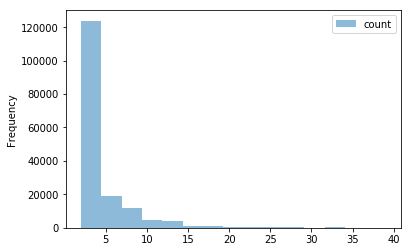

In [25]:
filtered.plot.hist(bins=15, alpha=0.5) #Clicks per session frequency

In [26]:
clean_df = pd.merge(clicks_df, filtered, on='session_id')
clean_df.head()

,client_id,session_id,page,date,time,timeframe,reg_no,make,model,fuel,colour,body,trasmission,count
0,1.000026e+08,1553267404527.4nell1ve,/search/ford/focus/manual-petrol-white-hatchba...,2019-03-22,15:10,1553267400,bt62axz,ford,focus,petrol,white,hatchback,manual,2
1,1.000026e+08,1553267404527.4nell1ve,/search/vauxhall/astra/manual-diesel-silver-ha...,2019-03-22,15:7,1553267220,fn65pka,vauxhall,astra,diesel,silver,hatchback,manual,2
2,1.000059e+09,1551464297765.jsxg0dp8,/search/bmw/4-series/manual-diesel-grey-hatchb...,2019-03-01,18:17,1551464220,fv17vfy,bmw,4-series,diesel,grey,hatchback,manual,2
3,1.000059e+09,1551464297765.jsxg0dp8,/search/jaguar/xf/automatic-petrol-grey-saloon...,2019-03-01,18:18,1551464280,na17wjf,jaguar,xf,petrol,grey,saloon,automatic,2
4,1.000059e+09,1551473993887.u4ef7aq,/search/bmw/4-series/manual-diesel-grey-hatchb...,2019-03-01,20:47,1551473220,fv17vfy,bmw,4-series,diesel,grey,hatchback,manual,5


In [27]:
clean_df.drop('count', axis=1, inplace=True)
print(len(clean_df))

720130


In [28]:
clean_df.to_csv("../clicks_clean.csv", index=False) #Save the cleaned data